In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier



In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network


In [4]:
data = pd.read_csv("D:\\Prathyu College\\YR 3 (SEM 6)\\Deep Learning\\DL PROJECT\\voice.csv")
data.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [6]:
print(data.shape)

(3168, 21)


In [7]:
print("Total number of labels: {}".format(data.shape[0]))
print("Number of male: {}".format(data[data.label == 'male'].shape[0]))
print("Number of female: {}".format(data[data.label == 'female'].shape[0]))

Total number of labels: 3168
Number of male: 1584
Number of female: 1584


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["label"] = le.fit_transform(data["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [9]:
data.loc[:,'label'][data['label']=="female"] = 0
data.loc[:,'label'][data['label']=="male"] = 1

C:\Users\prathyu\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\prathyu\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
#Creating X,y and splitting the dataset into training and testing

from sklearn.model_selection import train_test_split

X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [11]:
#Scaling the features

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [12]:
#Train logistic regression model

logit = LogisticRegression()
logit.fit(X_train_std, y_train)

print("Logistic Regression")
print("Accuracy on training set: {:.3f}".format(logit.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(logit.score(X_test_std, y_test)))

y_pred_logit = logit.predict(X_test_std)
print("Predicted value: ",y_pred_logit)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_logit, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Logistic Regression
Accuracy on training set: 0.978
Accuracy on test set: 0.965
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 1

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [20]:
cm = metrics.confusion_matrix(y_test, y_pred_logit)
print(cm)

[[460  16]
 [ 17 458]]


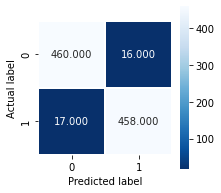

In [29]:
score = logit.score(X_test, y_test)
#print(score)

plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(score)
#plt.title(all_sample_title, size = 15);

In [31]:
#Train support vector machine model

svm = SVC()
svm.fit(X_train_std, y_train)

print("Support Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test_std, y_test)))

y_pred_sm = svm.predict(X_test_std)
print("Predicted value: ",y_pred_sm)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_sm, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Support Vector Machine
Accuracy on training set: 0.989
Accuracy on test set: 0.974
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0

In [32]:
cm = metrics.confusion_matrix(y_test, y_pred_sm)
print(cm)

[[465  11]
 [ 14 461]]


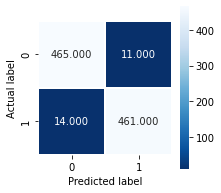

In [33]:
score = svm.score(X_test, y_test)
#print(score)

plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(score)
#plt.title(all_sample_title, size = 15);

In [35]:
#training with Support Vector Regression
#X_train, X_test, y_train, y_test
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
svr = SVR()
svr.fit(X_train_std, y_train)

print("Support Vector Regression")
print("Accuracy on training set: {:.3f}".format(svr.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(svr.score(X_test_std, y_test)))




Support Vector Regression
Accuracy on training set: 0.936
Accuracy on test set: 0.903


In [36]:
y_pred_svr = svm.predict(X_test_std)
print("Predicted value: ",y_pred_svr)

Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0
 1 0 1 

In [37]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_svr, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Precision, Recall and fscore: 0.9737118822292324 0.9737118822292324 0.9737118822292324


In [38]:
cm = metrics.confusion_matrix(y_test, y_pred_svr)
print(cm)

[[465  11]
 [ 14 461]]


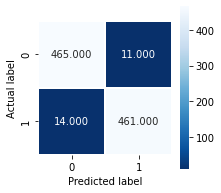

In [39]:
score = svr.score(X_test, y_test)
#print(score)

plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(score)
#plt.title(all_sample_title, size = 15);

In [40]:
#Train ensemble random forest model

forest_en = ensemble.RandomForestClassifier(n_estimators=5, random_state=0)
forest_en.fit(X_train_std, y_train)

print("Ensemble Random Forest")
print("Accuracy on training set: {:.3f}".format(forest_en.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(forest_en.score(X_test_std, y_test)))

y_pred_forest_en = forest_en.predict(X_test_std)
print("Predicted value: ",y_pred_forest_en)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_forest_en, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)


Ensemble Random Forest
Accuracy on training set: 1.000
Accuracy on test set: 0.965
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0

In [41]:
cm = metrics.confusion_matrix(y_test, y_pred_forest_en)
print(cm)

[[459  17]
 [ 16 459]]


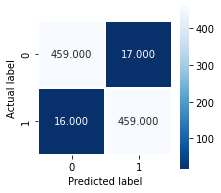

In [42]:
score = forest_en.score(X_test, y_test)
#print(score)

plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(score)
#plt.title(all_sample_title, size = 15);

In [46]:
#Train neural network model MLP
#MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1).fit(X_train, y_train)
print("Multilayer Perceptron")
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

y_pred_mlp = mlp.predict(X_test_std)
print("Predicted value: ",y_pred_mlp)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_mlp, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)


Multilayer Perceptron
Accuracy on training set: 0.969
Accuracy on test set: 0.953
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0


In [47]:
cm = metrics.confusion_matrix(y_test, y_pred_mlp)
print(cm)

[[453  23]
 [ 25 450]]


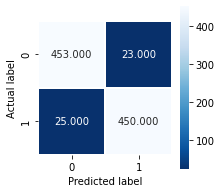

In [48]:
score = mlp.score(X_test, y_test)
#print(score)

plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(score)
#plt.title(all_sample_title, size = 15);

In [51]:
#Train xg boosting model

import xgboost

xgbrt = xgboost.XGBClassifier(random_state=0).fit(X_train, y_train)
print("XG Boost")
print("Accuracy on training set: {:.3f}".format(xgbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(xgbrt.score(X_test, y_test)))

y_pred_xgb = xgbrt.predict(X_test_std)
print("Predicted value: ",y_pred_xgb)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_xgb, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)




C:\Users\prathyu\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:43:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost
Accuracy on training set: 1.000
Accuracy on test set: 0.974
Predicted value:  [1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0
 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1
 1 

In [52]:
cm = metrics.confusion_matrix(y_test, y_pred_xgb)
print(cm)

[[426  50]
 [  8 467]]


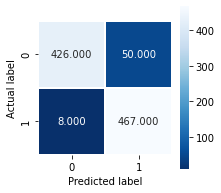

In [53]:
score = xgbrt.score(X_test, y_test)
#print(score)

plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(score)
#plt.title(all_sample_title, size = 15);

In [54]:
#Train gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
print("Gradient Boosting")
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

y_pred_gb = gbrt.predict(X_test_std)
print("Predicted value: ",y_pred_gb)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_gb, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Gradient Boosting
Accuracy on training set: 0.999
Accuracy on test set: 0.967
Predicted value:  [1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1
 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0
 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0
 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1
 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1
 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0
 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0
 1 0

In [55]:
cm = metrics.confusion_matrix(y_test, y_pred_gb)
print(cm)

[[426  50]
 [106 369]]


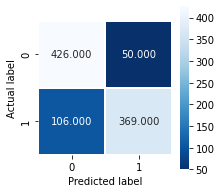

In [56]:
score = gbrt.score(X_test, y_test)
#print(score)

plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#all_sample_title = 'Accuracy Score: {0}'.format(score)
#plt.title(all_sample_title, size = 15);